**Determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters.**

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

%matplotlib inline

In [2]:
df = pd.read_csv('datasets/BostonMarathonData2014_llimllib.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [5]:
df.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [6]:
df.drop('ctz', axis=1).dropna().describe()

,division,age,official,genderdiv,overall,pace
count,29408.000000,29408.000000,29408.000000,29408.00000,29408.000000,29408.000000
mean,1976.889622,42.075116,243.867369,8056.54543,16087.288697,9.308791
std,1742.213933,11.359969,52.385368,4753.62884,9219.059556,1.995554
min,1.000000,18.000000,84.820000,1.00000,1.000000,3.250000
25%,627.000000,33.000000,206.230000,3986.75000,8138.750000,7.870000
50%,1452.000000,42.000000,233.100000,7973.00000,16113.500000,8.900000
75%,2714.000000,50.000000,274.470000,11985.25000,24090.250000,10.480000
max,6979.000000,81.000000,538.880000,17575.00000,31931.000000,20.570000


In [7]:
df = df.drop('ctz', axis=1).dropna()

In [8]:
# creating features, gender and age group dummies

features = df[['5k','10k','20k','half','25k','30k','35k','40k','pace','official','age']]

##

features['gender_male'] = 0
features.loc[(df['gender'] == 'M'), 'gender_male'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
features = features.convert_objects(convert_numeric=True)
features = features.dropna()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [10]:
features.head()

,5k,10k,20k,half,25k,30k,35k,40k,pace,official,age,gender_male
9,15.15,30.48,61.78,65.23,77.68,94.78,112.27,129.83,5.27,137.83,31,1
14,8.02,17.12,38.02,40.20,48.88,60.82,72.83,82.38,3.35,87.40,29,1
15,16.92,33.93,67.92,71.68,85.03,102.40,119.68,136.47,5.50,143.90,30,0
24,8.67,18.30,39.63,41.80,50.33,62.33,74.95,84.48,3.42,89.40,47,1
27,8.98,18.78,39.65,41.82,50.33,62.72,75.02,84.75,3.42,89.52,30,1


**Comparing male and female paces over race (young and old)**

In [180]:
features.loc['over_50_men_median'] = features[features['age'] >= 50][features['gender_male'] == 1].median()
features.loc['over_50_women_median'] = features[features['age'] >= 50][features['gender_male'] == 0].median()

features.loc['under_30_men_median'] = features[features['age'] <= 30][features['gender_male'] == 1].median()
features.loc['under_30_women_median'] = features[features['age'] <= 30][features['gender_male'] == 0].median()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [181]:
over_50_men_median_paces = features.loc['over_50_men_median'].iloc[:8].values.tolist()
over_50_men_median_paces_list = []
for j in over_50_men_median_paces:
    over_50_men_median_paces_list.append(j)

over_50_women_median_paces = features.loc['over_50_women_median'].iloc[:8].values.tolist()
over_50_women_median_paces_list = []
for j in over_50_women_median_paces:
    over_50_women_median_paces_list.append(j)
    
under_30_men_median_paces = features.loc['under_30_men_median'].iloc[:8].values.tolist()
under_30_men_median_paces_list = []
for j in under_30_men_median_paces:
    under_30_men_median_paces_list.append(j)

under_30_women_median_paces = features.loc['under_30_women_median'].iloc[:8].values.tolist()
under_30_women_median_paces_list = []
for j in under_30_women_median_paces:
    under_30_women_median_paces_list.append(j)

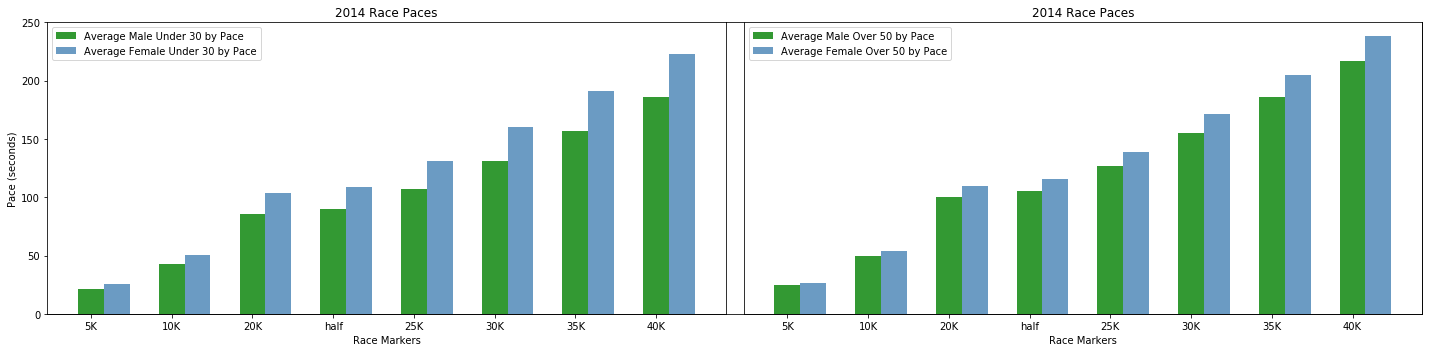

In [182]:
n_groups = 8

fig, ax = plt.subplots(figsize=(20,5))
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Comparing averages of Men and Women under 30

ax = fig.add_subplot(121)

index = np.arange(n_groups)
bar_width = 0.32
opacity = 0.8

rects1 = plt.bar(index, under_30_men_median_paces_list, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Average Male Under 30 by Pace')
 
rects2 = plt.bar(index + bar_width, under_30_women_median_paces_list, bar_width,
                 alpha=opacity,
                 color='steelblue',
                 label='Average Female Under 30 by Pace')
 
plt.xlabel('Race Markers')
plt.ylabel('Pace (seconds)')
plt.title('2014 Race Paces')
plt.yticks(np.arange(0, 260, 50))
plt.xticks(index, ('5K', '10K', '20K', 'half', '25K', '30K', '35K', '40K'))
plt.legend()

# Comparing averages of Men and Women over 50

ax = fig.add_subplot(122)
ax.axes.get_yaxis().set_visible(False)

index = np.arange(n_groups)
bar_width = 0.32
opacity = 0.8
 
rects1 = plt.bar(index, over_50_men_median_paces_list, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Average Male Over 50 by Pace')
 
rects2 = plt.bar(index + bar_width, over_50_women_median_paces_list, bar_width,
                 alpha=opacity,
                 color='steelblue',
                 label='Average Female Over 50 by Pace')
 
plt.xlabel('Race Markers')
plt.ylabel('Pace (seconds)')
plt.title('2014 Race Paces')
plt.xticks(index, ('5K', '10K', '20K', 'half', '25K', '30K', '35K', '40K'))
plt.legend()

plt.tight_layout()
plt.show()

**There appear to be smaller differences in pace between genders in older runners (over 50)**

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

In [199]:
# finding outliers for pace in older women vs. outliers for pace in older men

features_temp = features[['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'pace', 'official', 'age', 'gender_male']]

In [200]:
features_temp_over_50_men = features_temp[features_temp['gender_male'] == 1][features_temp['age'] >= 50]
features_temp_over_50_women = features_temp[features_temp['gender_male'] == 0][features_temp['age'] >= 50]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [252]:
DBSCAN_df_men = features_temp_over_50_men[['40k','pace']]
DBSCAN_df_women = features_temp_over_50_women[['40k','pace']]

In [253]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

dbsc = DBSCAN(eps = .5, min_samples = 25).fit(DBSCAN_df_men)

labels_men = dbsc.labels_
core_samples_men = np.zeros_like(labels_men, dtype = bool)
core_samples_men[dbsc.core_sample_indices_] = True

In [254]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

dbsc = DBSCAN(eps = .5, min_samples = 25).fit(DBSCAN_df_women)

labels_women = dbsc.labels_
core_samples_women = np.zeros_like(labels_women, dtype = bool)
core_samples_women[dbsc.core_sample_indices_] = True

In [255]:
filtro_men=list(core_samples_men)
DBSCAN_df_men['Filtro']=filtro_men

filtro_women=list(core_samples_women)
DBSCAN_df_women['Filtro']=filtro_women

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


**Looking at the cluster of runners (male and female) around the mean of pace at the 40k mark of the race:**

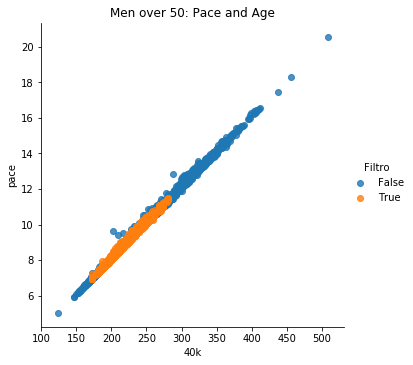

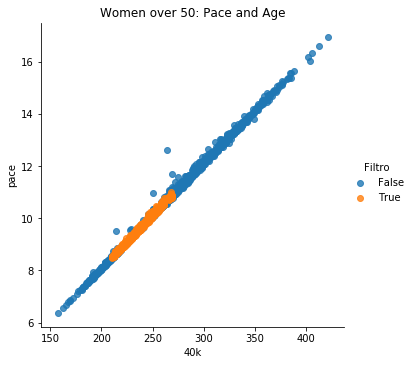

In [256]:
sns.lmplot('40k', 'pace', data=DBSCAN_df_men, fit_reg=False, hue='Filtro')
plt.title('Men over 50: Pace and Age')

sns.lmplot('40k', 'pace', data=DBSCAN_df_women, fit_reg=False, hue='Filtro')
plt.title('Women over 50: Pace and Age')

plt.show()

**Creating training and test sets for other clustering models: Clustering gender for runners over 50**

In [257]:
# Divide into training and test sets.
from sklearn.model_selection import train_test_split

X = features[features['age'] >= 50].drop(['gender_male'], axis=1)
y = features['gender_male'][features['age'] >= 50]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

**K-means - Predicting gender**

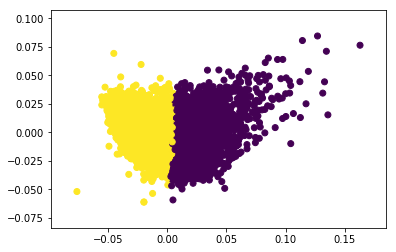

Comparing k-means clusters against the data:
gender_male   0.0   1.0
row_0                  
0            1045  1911
1            1479  3405


In [258]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

**with MiniBatch**

In [262]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0     0     1
row_0            
0         0  4680
1      2956   204


**Contingency Tables**

In [263]:
# Get predicted clusters.
full_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm)

pd.crosstab(y, full_pred) 

col_0,0,1
gender_male,,
0.0,1044,1480
1.0,1909,3407


**Adjusted Rand Index**

In [264]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y, full_pred)

0.01061002212208629

In [265]:
# Mean-shift w/ PCA
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 7


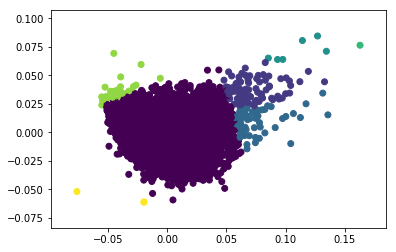

Comparing the assigned categories to the ones in the data:
col_0     0   1   2  3  4   5  6
row_0                           
0      2799  88  62  6  1   0  0
1      4845   0   0  0  0  36  3


In [266]:
# Mean-shift
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,labels))

**K-means and Mean-shift models are obviously imperfect; however, DBSCAN was able to provide a good visualization for the apparent tighter range for female (vs. male) runners within the 40k mark of the race in keeping their overall pace.**